In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [2]:
infant_mortality="/content/drive/MyDrive/data/infant_mortality (1).csv"

In [3]:
df=pd.read_csv(infant_mortality)

In [4]:
df.head(10)

,Year,State,Rate,Deaths,Name,Population,PovertyCount,PovertyRate,UnemploymentRate,NoCompletedEducation,PopulationWithHighSchoolDiploma,PopulationWithAssociatesDegree,PopulationWithBachelorsDegree,WhitePop,BlackPop,NativeAmericanPop,AsianPop,NativeHawaiianPop,HispanicPop,TwoOrMoreRacesPop
0,2019,AL,7.89,449,Alabama,4876250.0,795989.0,16.323794,2.708946,40837.0,841716.0,282316.0,529178.0,3320247.0,1299048.0,25565.0,66270.0,2238.0,208626.0,92220.0
1,2018,AL,6.94,401,Alabama,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
2,2017,AL,7.38,435,Alabama,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
3,2016,AL,9.03,534,Alabama,4841164.0,868666.0,17.943329,3.810633,42577.0,828205.0,258502.0,492382.0,3325037.0,1282053.0,23919.0,60744.0,2008.0,193503.0,85412.0
4,2015,AL,8.31,496,Alabama,4830620.0,887260.0,18.367415,4.287172,41876.0,826272.0,251335.0,478812.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,193492.0,81646.0
5,2019,AK,4.81,48,Alaska,737068.0,76933.0,10.437707,3.637114,3434.0,108797.0,41109.0,88058.0,476015.0,24205.0,109751.0,45920.0,9204.0,51870.0,60665.0
6,2018,AK,6.25,63,Alaska,738516.0,77865.0,10.543441,3.800459,3479.0,107913.0,40052.0,88053.0,478834.0,24129.0,106660.0,46556.0,8849.0,51186.0,62461.0
7,2017,AK,5.74,60,Alaska,738516.0,77865.0,10.543441,3.800459,3479.0,107913.0,40052.0,88053.0,478834.0,24129.0,106660.0,46556.0,8849.0,51186.0,62461.0
8,2016,AK,5.17,58,Alaska,736855.0,72826.0,9.883356,4.090221,3020.0,106169.0,39133.0,86551.0,483518.0,24443.0,103574.0,44218.0,8862.0,49031.0,62340.0
9,2015,AK,6.91,78,Alaska,733375.0,72957.0,9.948117,4.265894,2977.0,105527.0,37719.0,83201.0,484250.0,25022.0,101313.0,42921.0,8841.0,47808.0,61755.0


In [50]:
(df.Rate=="Unreliable").value_counts()

False    250
Name: Rate, dtype: int64

In [51]:
df.loc[(df.Name=="Vermont")&(df.Year==2019)]

,Year,State,Rate,Deaths,Name,Population,PovertyCount,PovertyRate,UnemploymentRate,NoCompletedEducation,PopulationWithHighSchoolDiploma,PopulationWithAssociatesDegree,PopulationWithBachelorsDegree,WhitePop,BlackPop,NativeAmericanPop,AsianPop,NativeHawaiianPop,HispanicPop,TwoOrMoreRacesPop
220,2019,VT,3,15,Vermont,624313.0,65652.0,10.515879,1.97385,2715.0,111530.0,38518.0,99016.0,587883.0,8502.0,2132.0,10461.0,325.0,12038.0,12600.0


In [7]:
df.at[220,"Rate"]=3

In [8]:
df.columns

Index(['Year', 'State', 'Rate', 'Deaths', 'Name', 'Population', 'PovertyCount',
       'PovertyRate', 'UnemploymentRate', 'NoCompletedEducation',
       'PopulationWithHighSchoolDiploma', 'PopulationWithAssociatesDegree',
       'PopulationWithBachelorsDegree', 'WhitePop', 'BlackPop',
       'NativeAmericanPop', 'AsianPop', 'NativeHawaiianPop', 'HispanicPop',
       'TwoOrMoreRacesPop'],
      dtype='object')

In [9]:
y=df[["Rate"]]

In [10]:
X=df.drop(columns=["Name", "Rate", "Deaths",])

In [11]:
X.head()

,Year,State,Population,PovertyCount,PovertyRate,UnemploymentRate,NoCompletedEducation,PopulationWithHighSchoolDiploma,PopulationWithAssociatesDegree,PopulationWithBachelorsDegree,WhitePop,BlackPop,NativeAmericanPop,AsianPop,NativeHawaiianPop,HispanicPop,TwoOrMoreRacesPop
0,2019,AL,4876250.0,795989.0,16.323794,2.708946,40837.0,841716.0,282316.0,529178.0,3320247.0,1299048.0,25565.0,66270.0,2238.0,208626.0,92220.0
1,2018,AL,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
2,2017,AL,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
3,2016,AL,4841164.0,868666.0,17.943329,3.810633,42577.0,828205.0,258502.0,492382.0,3325037.0,1282053.0,23919.0,60744.0,2008.0,193503.0,85412.0
4,2015,AL,4830620.0,887260.0,18.367415,4.287172,41876.0,826272.0,251335.0,478812.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,193492.0,81646.0


In [12]:
X.head()

,Year,State,Population,PovertyCount,PovertyRate,UnemploymentRate,NoCompletedEducation,PopulationWithHighSchoolDiploma,PopulationWithAssociatesDegree,PopulationWithBachelorsDegree,WhitePop,BlackPop,NativeAmericanPop,AsianPop,NativeHawaiianPop,HispanicPop,TwoOrMoreRacesPop
0,2019,AL,4876250.0,795989.0,16.323794,2.708946,40837.0,841716.0,282316.0,529178.0,3320247.0,1299048.0,25565.0,66270.0,2238.0,208626.0,92220.0
1,2018,AL,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
2,2017,AL,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
3,2016,AL,4841164.0,868666.0,17.943329,3.810633,42577.0,828205.0,258502.0,492382.0,3325037.0,1282053.0,23919.0,60744.0,2008.0,193503.0,85412.0
4,2015,AL,4830620.0,887260.0,18.367415,4.287172,41876.0,826272.0,251335.0,478812.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,193492.0,81646.0


In [13]:
X_cat=df[["State"]].copy()

In [14]:
X_num=X.drop(columns=["State"])

In [15]:
X_num.head()

,Year,Population,PovertyCount,PovertyRate,UnemploymentRate,NoCompletedEducation,PopulationWithHighSchoolDiploma,PopulationWithAssociatesDegree,PopulationWithBachelorsDegree,WhitePop,BlackPop,NativeAmericanPop,AsianPop,NativeHawaiianPop,HispanicPop,TwoOrMoreRacesPop
0,2019,4876250.0,795989.0,16.323794,2.708946,40837.0,841716.0,282316.0,529178.0,3320247.0,1299048.0,25565.0,66270.0,2238.0,208626.0,92220.0
1,2018,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
2,2017,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
3,2016,4841164.0,868666.0,17.943329,3.810633,42577.0,828205.0,258502.0,492382.0,3325037.0,1282053.0,23919.0,60744.0,2008.0,193503.0,85412.0
4,2015,4830620.0,887260.0,18.367415,4.287172,41876.0,826272.0,251335.0,478812.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,193492.0,81646.0


In [16]:
le=LabelEncoder()

In [17]:
X_cat["State"]= le.fit_transform(X_cat["State"])

In [18]:
X_cat

,State
0,1
1,1
2,1
3,1
4,1
...,...
245,49
246,49
247,49
248,49


In [19]:
X_combined=pd.concat([X_cat, X_num],axis=1)
X_combined.head()

,State,Year,Population,PovertyCount,PovertyRate,UnemploymentRate,NoCompletedEducation,PopulationWithHighSchoolDiploma,PopulationWithAssociatesDegree,PopulationWithBachelorsDegree,WhitePop,BlackPop,NativeAmericanPop,AsianPop,NativeHawaiianPop,HispanicPop,TwoOrMoreRacesPop
0,1,2019,4876250.0,795989.0,16.323794,2.708946,40837.0,841716.0,282316.0,529178.0,3320247.0,1299048.0,25565.0,66270.0,2238.0,208626.0,92220.0
1,1,2018,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
2,1,2017,4864680.0,829400.0,17.049426,3.040241,41240.0,838776.0,273493.0,515443.0,3317453.0,1293186.0,25576.0,64609.0,2182.0,203146.0,91619.0
3,1,2016,4841164.0,868666.0,17.943329,3.810633,42577.0,828205.0,258502.0,492382.0,3325037.0,1282053.0,23919.0,60744.0,2008.0,193503.0,85412.0
4,1,2015,4830620.0,887260.0,18.367415,4.287172,41876.0,826272.0,251335.0,478812.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,193492.0,81646.0


In [20]:
y["Rate"]

0      7.89
1      6.94
2      7.38
3      9.03
4      8.31
       ... 
245       7
246    5.33
247    4.64
248    5.01
249    4.89
Name: Rate, Length: 250, dtype: object

train test split 

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, random_state=42)
X_train.head()

,State,Year,Population,PovertyCount,PovertyRate,UnemploymentRate,NoCompletedEducation,PopulationWithHighSchoolDiploma,PopulationWithAssociatesDegree,PopulationWithBachelorsDegree,WhitePop,BlackPop,NativeAmericanPop,AsianPop,NativeHawaiianPop,HispanicPop,TwoOrMoreRacesPop
84,16,2015,4397353.0,805841.0,18.325593,3.963930,32837.0,788112.0,221409.0,386554.0,3851591.0,347034.0,9063.0,55483.0,2197.0,143481.0,90836.0
125,25,2019,1050649.0,134605.0,12.811605,2.047592,3154.0,175082.0,66951.0,155230.0,930204.0,5303.0,66839.0,8259.0,807.0,40314.0,32161.0
167,27,2017,752201.0,79270.0,10.538407,1.553973,3019.0,113235.0,67212.0,105552.0,655268.0,20445.0,39462.0,10814.0,378.0,26529.0,18306.0
245,49,2019,581024.0,62257.0,10.715048,2.331057,1881.0,93507.0,43761.0,68269.0,531304.0,5582.0,14164.0,5025.0,596.0,57341.0,15521.0
109,21,2015,9900571.0,1616870.0,16.331078,4.825439,72158.0,1722171.0,595198.0,1094936.0,7823875.0,1381388.0,53951.0,268766.0,2083.0,467021.0,261324.0


In [22]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(f"Training Data Score: {model_lr.score(X_train, y_train)}")
print(f"Testing Data Score: {model_lr.score(X_test, y_test)}")

Training Data Score: 0.6330406857040429
Testing Data Score: 0.6870369983977309


In [24]:
import joblib

In [25]:
joblib.dump(model_lr,"/content/drive/MyDrive/model_lr_rate.sav")

['/content/drive/MyDrive/model_lr_rate.sav']

In [39]:
y_preds=model_lr.predict(X_test)

# New Section

In [28]:
print("coefficents",model_lr.coef_)

coefficents [[-6.86491062e-03 -1.03234059e-01  1.96652759e-06 -2.85177166e-06
   1.99746853e-01 -2.83719841e-01 -1.16094312e-05  2.51688726e-07
   6.38802476e-07 -6.77078098e-06 -9.80304704e-07  1.65252504e-07
  -2.80523356e-06 -8.25325303e-07 -7.52111034e-06  7.19574713e-08
   3.93847982e-06]]


In [33]:
model_lr.intercept_

array([212.36692951])

In [35]:
X_test.columns

Index(['State', 'Year', 'Population', 'PovertyCount', 'PovertyRate',
       'UnemploymentRate', 'NoCompletedEducation',
       'PopulationWithHighSchoolDiploma', 'PopulationWithAssociatesDegree',
       'PopulationWithBachelorsDegree', 'WhitePop', 'BlackPop',
       'NativeAmericanPop', 'AsianPop', 'NativeHawaiianPop', 'HispanicPop',
       'TwoOrMoreRacesPop'],
      dtype='object')

In [79]:
import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'Infant Mortality Rate')

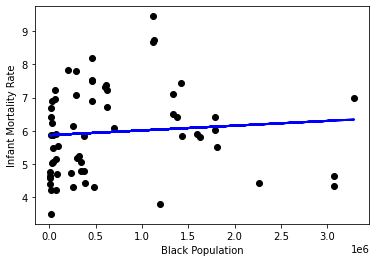

In [82]:
x=X_test["BlackPop"]
y=y_test["Rate"].astype(float)

plt.scatter(x,y, color="black")
m,b=np.polyfit(x,y,1)
plt.plot(x,m*x+b, color="blue", linewidth=2)
plt.xlabel("Black Population")
plt.ylabel("Infant Mortality Rate")

Text(0, 0.5, 'Infant Mortality Rate')

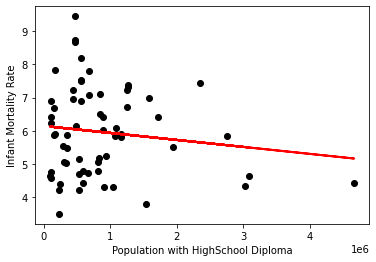

In [83]:
x=X_test["PopulationWithHighSchoolDiploma"]
y=y_test["Rate"].astype(float)

plt.scatter(x,y, color="black")
m,b=np.polyfit(x,y,1)
plt.plot(x,m*x+b, color="red", linewidth=2)
plt.xlabel("Population with HighSchool Diploma")
plt.ylabel("Infant Mortality Rate")

Text(0, 0.5, 'Infant Mortality Rate')

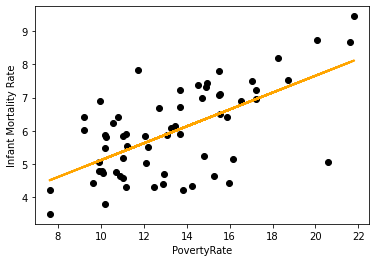

In [85]:
x=X_test["PovertyRate"]
y=y_test["Rate"].astype(float)

plt.scatter(x,y, color="black")
m,b=np.polyfit(x,y,1)
plt.plot(x,m*x+b, color="orange", linewidth=2)
plt.xlabel("PovertyRate")
plt.ylabel("Infant Mortality Rate")

In [73]:
y_preds.shape

(63, 1)

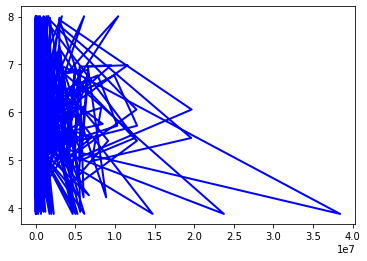

In [41]:
plt.plot(X_test, y_preds, color="blue", linewidth=2)

In [49]:
y_test.isnull().value_counts()

Rate 
False    63
dtype: int64